In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Loading in data

In [2]:
anthropic_df = pd.read_csv("anthropic_evals_4_10.csv")
bedrock_df = pd.read_csv("final_bedrock_evals.csv")

### Preprocessing to combine dfs

In [3]:
combined_df = anthropic_df.rename(
    columns={
        "generation_time": "anthropic_generation_time",
        "mongodb_evaluation": "anthropic_mongodb_evaluation",
        "mongodb_score": "anthropic_mongodb_score",
        "response_evaluation": "anthropic_response_evaluation",
        "response_score": "anthropic_response_score",
    }
)


combined_df["bedrock_generation_time"] = bedrock_df["generation_time"]
combined_df["bedrock_mongodb_evaluation"] = bedrock_df["mongodb_evaluation"]
combined_df["bedrock_mongodb_score"] = bedrock_df["mongodb_score"]
combined_df["bedrock_response_evaluation"] = bedrock_df["response_evaluation"]
combined_df["bedrock_response_score"] = bedrock_df["response_score"]


In [4]:
combined_df.shape

(56, 19)

## Analysis

In [3]:
bedrock_df['response_evaluation'].value_counts()

response_evaluation
CORRECT      51
INCORRECT    10
ERROR         7
Name: count, dtype: int64

In [4]:
bedrock_df['response_score'].mean()

0.75

In [7]:
anthropic_df['response_evaluation'].value_counts()

response_evaluation
CORRECT      35
INCORRECT    12
ERROR         9
Name: count, dtype: int64

In [6]:
anthropic_df['response_score'].mean()

0.625

In [6]:
bedrock_df['data_source'].value_counts()

data_source
direct_database    41
vectorstore        15
data_schema         5
Name: count, dtype: int64

In [5]:
bedrock_df[["data_source", "response_score", "generation_time"]].groupby("data_source").mean()

,response_score,generation_time
data_source,,
data_schema,0.800000,16.688374
direct_database,0.780488,33.087801
vectorstore,1.000000,22.189203


In [9]:
anthropic_df[["data_source", "response_score", "generation_time"]].groupby("data_source").mean()

,response_score,generation_time
data_source,,
data_schema,0.666667,14.107264
direct_database,0.666667,31.785461
vectorstore,0.850000,18.117296


The mean answer generation time through bedrock is 24.110693305916666


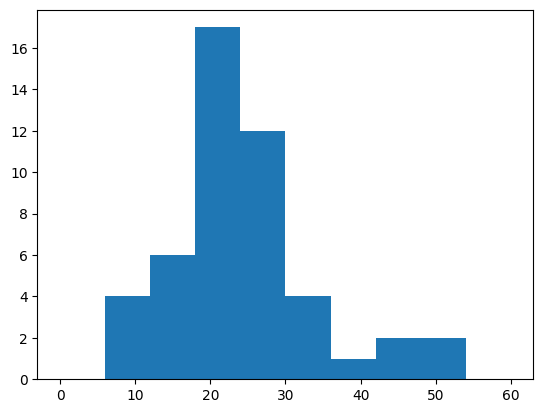

The mean answer generation time through anthropic is 23.712429376531915


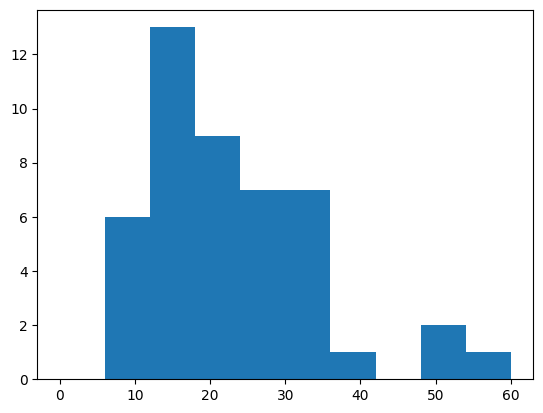

In [13]:
bedrock_no_error_df = bedrock_df.where(bedrock_df['response_evaluation']!= "ERROR")
print(f"The mean answer generation time through bedrock is {bedrock_no_error_df.loc[:, 'generation_time'].mean()}")
plt.hist(bedrock_no_error_df['generation_time'], range = (0,60))
plt.show()

anthropic_no_error_df = anthropic_df.where(anthropic_df['response_evaluation']!= "ERROR")
print(f"The mean answer generation time through anthropic is {anthropic_no_error_df.loc[:, 'generation_time'].mean()}")
plt.hist(anthropic_no_error_df['generation_time'], range = (0,60))
plt.show()

In [14]:
bedrock_no_error_df.loc[:, 'generation_time'].describe()

count    48.000000
mean     24.110693
std       9.548585
min       8.587128
25%      19.235400
50%      23.198877
75%      27.174909
max      49.625568
Name: generation_time, dtype: float64

In [15]:
anthropic_no_error_df.loc[:, 'generation_time'].describe()

count    47.000000
mean     23.712429
std      12.516461
min       9.271640
25%      13.921568
50%      20.438319
75%      29.702360
max      60.654992
Name: generation_time, dtype: float64

The mean answer generation time through bedrock is 29.026373698461537


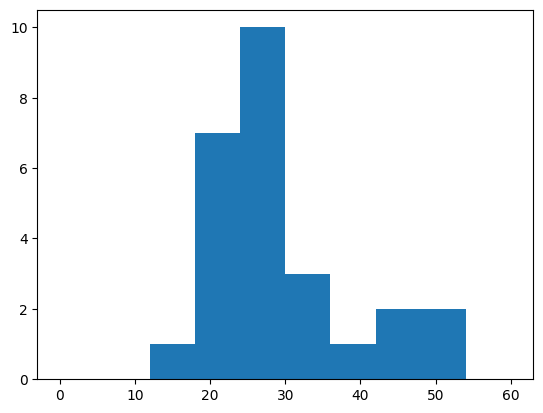

In [11]:
bedrock_mongodb_df = bedrock_no_error_df.loc[bedrock_no_error_df["data_source"] == "direct_database"]
print(f"The mean answer generation time through bedrock is {bedrock_mongodb_df.loc[:, 'generation_time'].mean()}")
plt.hist(bedrock_mongodb_df['generation_time'], range = (0,60))
plt.show()

The mean answer generation time through bedrock is 31.785460608095242


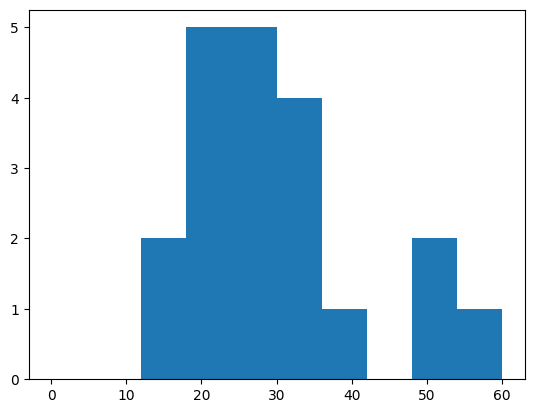

In [14]:
anthropic_mongodb_df = anthropic_no_error_df.loc[anthropic_no_error_df["data_source"] == "direct_database"]
print(f"The mean answer generation time through bedrock is {anthropic_mongodb_df.loc[:, 'generation_time'].mean()}")
plt.hist(anthropic_mongodb_df['generation_time'], range = (0,60))
plt.show()

In [15]:
anthropic_mongodb_df.loc[:, 'generation_time'].describe()

count    21.000000
mean     31.785461
std      13.201806
min      16.620259
25%      23.138322
50%      27.060046
75%      35.336551
max      60.654992
Name: generation_time, dtype: float64

In [16]:
bedrock_mongodb_df.loc[:, 'generation_time'].describe()

count    26.000000
mean     29.026374
std       9.044874
min      17.833861
25%      23.152946
50%      25.824014
75%      31.367720
max      49.625568
Name: generation_time, dtype: float64

In [9]:
bedrock_no_error_df

,input_question,target_mongodb_query,target_python,target_answer,predicted_answer,generation_time,response_evaluation,response_score,predicted_mongodb_query,mongodb_evaluation,mongodb_score,data_source
0,Identify the number of assets where acquisitio...,NaN,NaN,There are 3984 records where acquisition.exper...,Based on the MongoDB aggregation pipeline resu...,25.533807,INCORRECT,0.0,{'agg_pipeline': [{'$match': {'acquisition': {...,CORRECT,1.0,direct_database
1,for mouse 721291 can you make a table of sessi...,"{""filter"":{""subject.subject_id"":""721291""},""pro...",NaN,"Sessions for Mouse 721291\n Session, Date, Ses...",I'll create a table of sessions for mouse 7212...,26.114222,CORRECT,1.0,"{'filter': {'subject.subject_id': '721291'}, '...",CORRECT,1.0,direct_database
3,How many records use the session.data_streams....,"{""agg_pipeline"":[{""$match"":{""session.data_stre...",NaN,there are 5488 records with session.data_strea...,Based on the MongoDB aggregation query results...,19.897954,CORRECT,1.0,{'agg_pipeline': [{'$match': {'session.data_st...,CORRECT,1.0,direct_database
4,can you tell me how many sessions exist for 77...,"filter = {""subject.subject_id"": ""775745""}\npro...",import json\nfrom aind_data_access_api.documen...,There are 50 sessions for subject 775745,"Based on the retrieved documents, there are 8 ...",17.833861,INCORRECT,0.0,"{'filter': {'subject.subject_id': '775745'}, '...",CORRECT,1.0,direct_database
6,Generate code to find experiments where the an...,"{""agg_pipeline"":[{""$match"":{""procedures.subjec...",import json\nfrom aind_data_access_api.documen...,I'll create a MongoDB aggregation pipeline to ...,I'll help you generate the code to find experi...,48.483926,CORRECT,1.0,{'agg_pipeline': [{'$match': {'procedures': {'...,CORRECT,1.0,direct_database
8,what are the modalities of the assets for the ...,agg_pipeline = [\n {'$match': {'data_descri...,import json\nfrom collections import Counter\n...,"""Selective plane illumination microscopy"", ""Ex...",Based on the aggregation results for the 'U19 ...,24.301843,CORRECT,1.0,{'agg_pipeline': [{'$match': {'data_descriptio...,CORRECT,1.0,direct_database
15,what was the average age of animals injected w...,NaN,NaN,The analysis shows that the animals were perfu...,I'll help you calculate the average age of ani...,29.980281,INCORRECT,0.0,{'agg_pipeline': [{'$match': {'procedures.subj...,INCORRECT,0.0,direct_database
20,Are there any data assets within the patch fo...,"{""agg_pipeline"":[{""$match"":{""data_description....",NaN,Missing Metadata Fields in Patch Foraging Grou...,To determine if there are any data assets with...,31.800274,INCORRECT,0.0,{'filter': {'data_description.project_name': {...,INCORRECT,0.0,direct_database
24,Give me the query used to identify 5 subject I...,"agg_pipeline = [\n {\n ""$match"": {\n...",import json\nfrom aind_data_access_api.documen...,import json\nfrom aind_data_access_api.documen...,I'll provide a complete Python implementation ...,46.505070,CORRECT,1.0,{'agg_pipeline': [{'$match': {'subject.subject...,CORRECT,1.0,direct_database
25,Find all experiments where the acquisition.ins...,NaN,from aind_data_access_api.document_db import M...,There are 592 assets where the acquisition.ins...,"Based on the retrieved documents, I'll provide...",49.625568,INCORRECT,0.0,{'agg_pipeline': [{'$match': {'acquisition.ins...,CORRECT,1.0,direct_database


In [23]:
anthropic_df.where(anthropic_df['cache_tokens'] != {})

,input_question,target_mongodb_query,target_python,target_answer,predicted_answer,generation_time,response_evaluation,response_score,predicted_mongodb_query,mongodb_evaluation,mongodb_score,cache_tokens,total_token_stream
0,Identify the number of assets where acquisitio...,NaN,NaN,There are 3984 records where acquisition.exper...,I'll help you analyze the MongoDB aggregation ...,51.462044,INCORRECT,0,{'agg_pipeline': [{'$match': {'acquisition': {...,CORRECT,1.0,"{'database_query': {'cache_read': 0, 'cache_cr...",{'datasource_router': {'claude-3-5-haiku-20241...
1,for mouse 721291 can you make a table of sessi...,"{""filter"":{""subject.subject_id"":""721291""},""pro...",NaN,"Sessions for Mouse 721291\n Session, Date, Ses...","Based on the provided context, I can create a ...",17.022686,CORRECT,1,No MongoDB query was generated,INCORRECT,0.0,{},{'datasource_router': {'claude-3-5-haiku-20241...
2,Tell me about mouse 747107,"{""subject.subject_id"": ""747107""}",NaN,Mouse 747107 is a female Mus musculus with the...,"Based on the provided context, I can tell you ...",31.446949,CORRECT,1,No MongoDB query was generated,INCORRECT,0.0,{},{'datasource_router': {'claude-3-5-haiku-20241...
3,How many records use the session.data_streams....,"{""agg_pipeline"":[{""$match"":{""session.data_stre...",NaN,there are 5488 records with session.data_strea...,I'll help you interpret this MongoDB aggregati...,28.414930,CORRECT,1,{'agg_pipeline': [{'$match': {'session.data_st...,CORRECT,1.0,"{'database_query': {'cache_read': 82148, 'cach...",{'datasource_router': {'claude-3-5-haiku-20241...
4,can you tell me how many sessions exist for 77...,"filter = {""subject.subject_id"": ""775745""}\npro...",import json\nfrom aind_data_access_api.documen...,There are 8 sessions for subject 775745,"Based on the retrieved documents, I can provid...",19.401492,CORRECT,1,"{'filter': {'subject.subject_id': '775745'}, '...",CORRECT,1.0,"{'database_query': {'cache_read': 82148, 'cach...",{'datasource_router': {'claude-3-5-haiku-20241...
5,Find how many experimental sessions conducted ...,"{""agg_pipeline"":[{""$match"":{""$or"":[{""acquisiti...",NaN,86 sessions were conducted by Marton Rozsa,Error: list index out of range,NaN,ERROR,0,ERROR,NaN,NaN,NaN,NaN
6,Generate code to find experiments where the an...,"{""agg_pipeline"":[{""$match"":{""procedures.subjec...",import json\nfrom aind_data_access_api.documen...,I'll create a MongoDB aggregation pipeline to ...,I'll help you analyze and code the query to fi...,39.719092,INCORRECT,0,{'agg_pipeline': [{'$match': {'procedures.subj...,INCORRECT,0.0,"{'database_query': {'cache_read': 82148, 'cach...",{'datasource_router': {'claude-3-5-haiku-20241...
7,What are the injections for SmartSPIM_675387_2...,"{""filter"":{""name"":""SmartSPIM_675387_2023-05-23...",import json\n\nfrom aind_data_access_api.docum...,\n Based on the provided co...,"Based on the provided context, the specimen ID...",18.084817,CORRECT,1,No MongoDB query was generated,INCORRECT,0.0,{},{'datasource_router': {'claude-3-5-haiku-20241...
8,what are the modalities of the assets for the ...,agg_pipeline = [\n {'$match': {'data_descri...,import json\nfrom collections import Counter\n...,"""Selective plane illumination microscopy"", ""Ex...","Based on the provided context, the modality of...",15.964290,CORRECT,1,No MongoDB query was generated,INCORRECT,0.0,{},{'datasource_router': {'claude-3-5-haiku-20241...
9,What is Acquisition?,NaN,NaN,An Acquisition in AIND metadata refers to the ...,# What is Acquisition?\n\nAcquisition refers t...,13.968735,CORRECT,1,No MongoDB query was generated,ERROR,0.0,{},{'datasource_router': {'claude-3-5-haiku-20241...


In [5]:
combined_df['anthropic_mongodb_evaluation'].value_counts()

anthropic_mongodb_evaluation
CORRECT      22
INCORRECT    14
ERROR         9
Name: count, dtype: int64

In [6]:
combined_df['bedrock_mongodb_evaluation'].value_counts()

bedrock_mongodb_evaluation
CORRECT      23
INCORRECT    12
ERROR        10
Name: count, dtype: int64

In [8]:
combined_df['anthropic_response_evaluation'].value_counts()

anthropic_response_evaluation
INCORRECT    31
ERROR         8
CORRECT       6
Name: count, dtype: int64

In [7]:
combined_df['bedrock_response_evaluation'].value_counts()

bedrock_response_evaluation
CORRECT      24
INCORRECT    11
ERROR        10
Name: count, dtype: int64